In [1]:
from matplotlib import *
from pylab import *
from numpy import *
from pyspecdata import *

In [2]:
filename = 'VectorH_240523.fld'
fl = figlist_var()

In [3]:
def construct_axes_from_positions(positions):
    #{{{ construct the axes
    list_of_axes = [unique(positions[:,j]) for j in range(0,3)]
    list_of_indeces = [0,1,2]
    for j in range(0,len(list_of_axes)):
        if len(list_of_axes[j]) == 1:
            list_of_axes.pop(j)
            list_of_indeces.pop(j)
            break
    [u_axis,v_axis] = list_of_axes
    [u_index,v_index] = list_of_indeces
    return u_index,v_index,u_axis,v_axis
    #}}}

In [4]:
def load_hfss_vectors(filename,show_valid = True):
    fp = open(filename,'r')
    data = fp.readlines()
    fp.close()
    header = data[0:2]
    print("the second line tells me what's in the file -- x,y,z, followed by the 3 positions of vector data and the final part tells me what it is")
    print('header is',r'\begin{verbatim}', header, r'\end{verbatim}')
    data = data[2:]
    positions = empty((len(data),3),dtype = 'double')
    vec_vals = empty((len(data),3),dtype = 'double')
    for j,line in enumerate(data):
        vals = [double(x) for x in line.strip().split(" ") if len(x)>0]
        positions[j,:] = vals[0:3]
        vec_vals[j,:] = vals[3:]
    u_index,v_index,u_axis,v_axis = construct_axes_from_positions(positions)
    #{{{ show the datapoints and which are valid
    if show_valid:
        fl.next('show valid values')
        thismask = isnan(vec_vals[:,2])
        fl.plot(positions[:,0][thismask],positions[:,v_index][thismask],'r.')
        fl.plot(positions[:,0][~thismask],positions[:,v_index][~thismask],'b.')
        xlabel('x')
        ylabel('z')
        axes().set_aspect('equal', 'datalim')
    #}}}
    data = empty((len(u_axis),len(v_axis),3),dtype = 'double')
    for j in range(0,positions.shape[0]):
        u_i = where(u_axis == positions[j,u_index])[0][0]
        v_i = where(v_axis == positions[j,v_index])[0][0]
        data[u_i,v_i,:] = vec_vals[j,:]
    return u_index,u_axis,v_index,v_axis,data

In [5]:
load_hfss_vectors(filename, show_valid = False)

the second line tells me what's in the file -- x,y,z, followed by the 3 positions of vector data and the final part tells me what it is
header is \begin{verbatim} ['Grid Output Min: [-25mm 0mm -20mm] Max: m 0mm 50mm] Grid Size: m 0mm 1mm]\n', 'X, Y, Z, Vector data "Vector_H"\n'] \end{verbatim}


(0,
 array([-0.025, -0.024, -0.023, -0.022, -0.021, -0.02 , -0.019, -0.018,
        -0.017, -0.016, -0.015, -0.014, -0.013, -0.012, -0.011, -0.01 ,
        -0.009, -0.008, -0.007, -0.006, -0.005, -0.004, -0.003, -0.002,
        -0.001,  0.   ,  0.001,  0.002,  0.003,  0.004,  0.005,  0.006,
         0.007,  0.008,  0.009,  0.01 ,  0.011,  0.012,  0.013,  0.014,
         0.015,  0.016,  0.017,  0.018,  0.019,  0.02 ,  0.021,  0.022,
         0.023,  0.024,  0.025]),
 2,
 array([-0.02 , -0.019, -0.018, -0.017, -0.016, -0.015, -0.014, -0.013,
        -0.012, -0.011, -0.01 , -0.009, -0.008, -0.007, -0.006, -0.005,
        -0.004, -0.003, -0.002, -0.001,  0.   ,  0.001,  0.002,  0.003,
         0.004,  0.005,  0.006,  0.007,  0.008,  0.009,  0.01 ,  0.011,
         0.012,  0.013,  0.014,  0.015,  0.016,  0.017,  0.018,  0.019,
         0.02 ,  0.021,  0.022,  0.023,  0.024,  0.025,  0.026,  0.027,
         0.028,  0.029,  0.03 ,  0.031,  0.032,  0.033,  0.034,  0.035,
         0.036,  0.037

In [6]:
fp = open(filename, 'r')
data = fp.readlines()
data = data[2:]
positions = empty((len(data),3),dtype = 'double')
vec_vals = empty((len(data),3),dtype = 'double')
print(shape(data))
print(shape(positions))
print(shape(vec_vals))

(3621,)
(3621, 3)
(3621, 3)


In [7]:
for j,line in enumerate(data):
    vals = [double(x) for x in line.strip().split(" ") if len(x)>0]
    positions[j,:] = vals[0:3]
    vec_vals[j,:] = vals[3:]
u_index,v_index,u_axis,v_axis = construct_axes_from_positions(positions)
print(shape(positions))
print(shape(vec_vals))

(3621, 3)
(3621, 3)


In [8]:
fl.next('show valid values')
thismask = isnan(vec_vals[:,2])
print(thismask)

[ True  True  True ...  True  True  True]


<Figure size 1132.62x700 with 0 Axes>

In [9]:
vec_vals_only = vec_vals[np.isfinite(vec_vals)]
print(vec_vals_only)
print(shape(vec_vals_only))

[-1.43149685e+00 -6.68706036e+02 -6.74250286e-02 ... -2.54792731e+00
  3.10979863e+02  8.66613975e-02]
(4866,)


In [17]:
vec_vals_only = vec_vals_only.reshape(4866/3,3)

TypeError: 'float' object cannot be interpreted as an integer

c:\users\warre\git\pyspecdata\pyspecdata\core.py:987: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  retval = myplotfunc(*plotargs,**kwargs)
c:\users\warre\git\pyspecdata\pyspecdata\core.py:987: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  retval = myplotfunc(*plotargs,**kwargs)


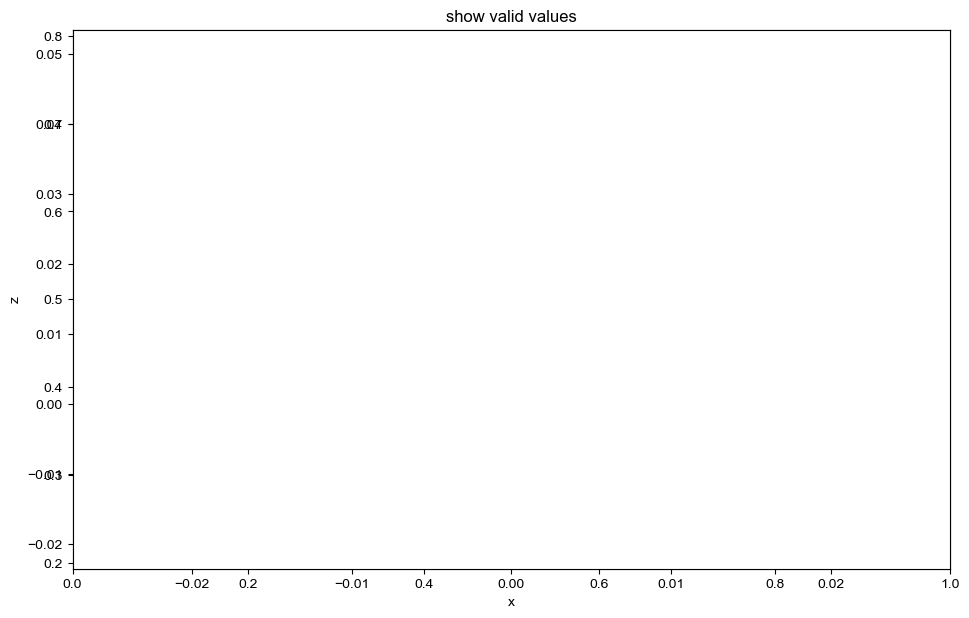

In [10]:
fl.plot(positions[:,0][thismask],positions[:,v_index][thismask],'r.')
fl.plot(positions[:,0][~thismask],positions[:,v_index][~thismask],'b.')
xlabel('x')
ylabel('z')
axes().set_aspect('equal', 'datalim')

In [11]:
data = empty((len(u_axis),len(v_axis),3),dtype = 'double')
for j in range(0,positions.shape[0]):
    u_i = where(u_axis == positions[j,u_index])[0][0]
    v_i = where(v_axis == positions[j,v_index])[0][0]
    data[u_i,v_i,:] = vec_vals[j,:]

In [12]:
vectors_xyz = np.zeros((3621,3))
np.isnan(vec_vals, vectors_xyz, where=False)
np.nonzero(vectors_xyz)

(array([], dtype=int64), array([], dtype=int64))

In [13]:
print(u_i)
print(v_i)
print(u_index)
print(v_index)

50
70
0
2


Text(0, 0.5, 'z')

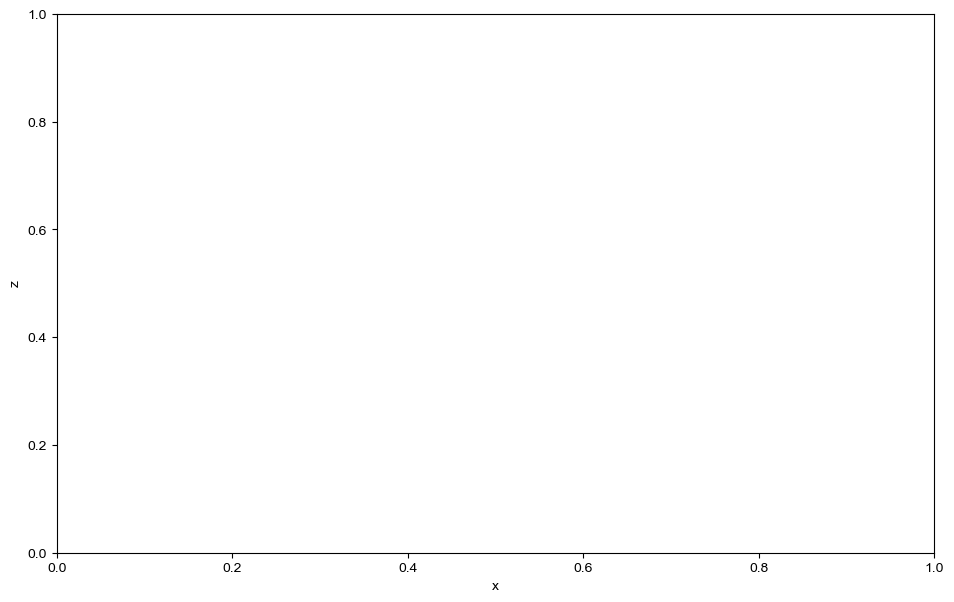

In [14]:
fl.next('field plot')
xlabel('x')
ylabel('z')
#axis.Axis.set_major_formatter(u_axis)
#axis.Axis.set_major_formatter(v_axis)